# Table of Contents
1. [Instruction](#intro)

2. [Data description](#description)

    2.1 [Load libraries and data](#load_data)
    
    2.2 [Missing data](# )
    
    2.3 [Preliminary variables selection](#)
    
      2.3.1 [Scatter matrix](#)
        
      2.3.2 [Use VIF to identify highly correlated quantitative predictors](#)
    
    2.4 [Get dummy variables](#)
    
    2.5 [Normalization](#)
    
    
3. [Linear Regression Model](#lm)

    3.1 [](#cal_IMI)

    3.2 [IMI's relationships with other features](#imi_relat)
    
    3.3 [Section summary](#3sum)

4. [Data loss analysis](#loss)
    
    4.1 [Quantify the loss](#quantify)
    
    4.2 [Identify anomalies](#anomalies)
    
    4.3 [Section summary](#4sum)

5. [Conclusion](#con)

<a id = intro ></a>
# 1. Introduction


<font color='red'>- why house price? background...</font>

In this project, we will use statistical methods to predict the house prices in Ames, Iowa. The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) was compiled by Dean De Cock for use in data science education. The goal of this study is to build a regression model to predict the house price using the multiple features from the house price data. 

This paper is organized as follows: in Section 2, we will describe the data set and do some exploratory data analysis; in Section 3, we will build a regression model and conduct model selection with forward selection method; in Section 4, we will do some diagnositic tests and influence analysis; finally, we will conclude this project in Section 5. 

<font color='red'>- Are there any effects of particular interest? </font>

<font color='red'>- How might these goals be answered, i.e. tests / confidence intervals?</font>

# 2. Data description

The data set analyzed in this project is from [Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview). Let's first take a look at the data.

In [1]:
# Set up environment
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


## 2.1 load libraries and data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load data
all_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 79 explanatory variables describing (almost) every aspect of residential homes, including both categorical and numerical variables:
- MSSubClass: the type of dwelling involved in the sale
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Evaluates the quality of the material on the exterior 
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality (Assume typical unless deductions are warranted)
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SaleType: Type of sale
- SaleCondition: Condition of sale.

The dependent variable is the house price ("SalePrice").

It can be seen from the data frame that some data are missing. Before we get started with modeling, we need to clean the data frame and conduct explorotary data analysis.

## 2.2 Missing data

In [4]:
# Missing data
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


The above table shows the percentage of missing data in each column. For the columns with over 15% missing data, we drop the whole columns, i.e. the features. For the rest missing data, we could delete the rows, i.e., the samples.

In [5]:
data = all_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','Id'],axis = 1)
data = data.dropna()

In [6]:
data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,...,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,...,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,...,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,...,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2.3 Preliminary variables selection

In this part, we will use the cleaned data from last part to do some preliminary variables selection. We will drop the outliers and unnecessary variables. To do that, let's plot the scatter matrix of all variables. In the plot, the y-axis is "SalePrice".

### 2.3.1 Scatter matrix

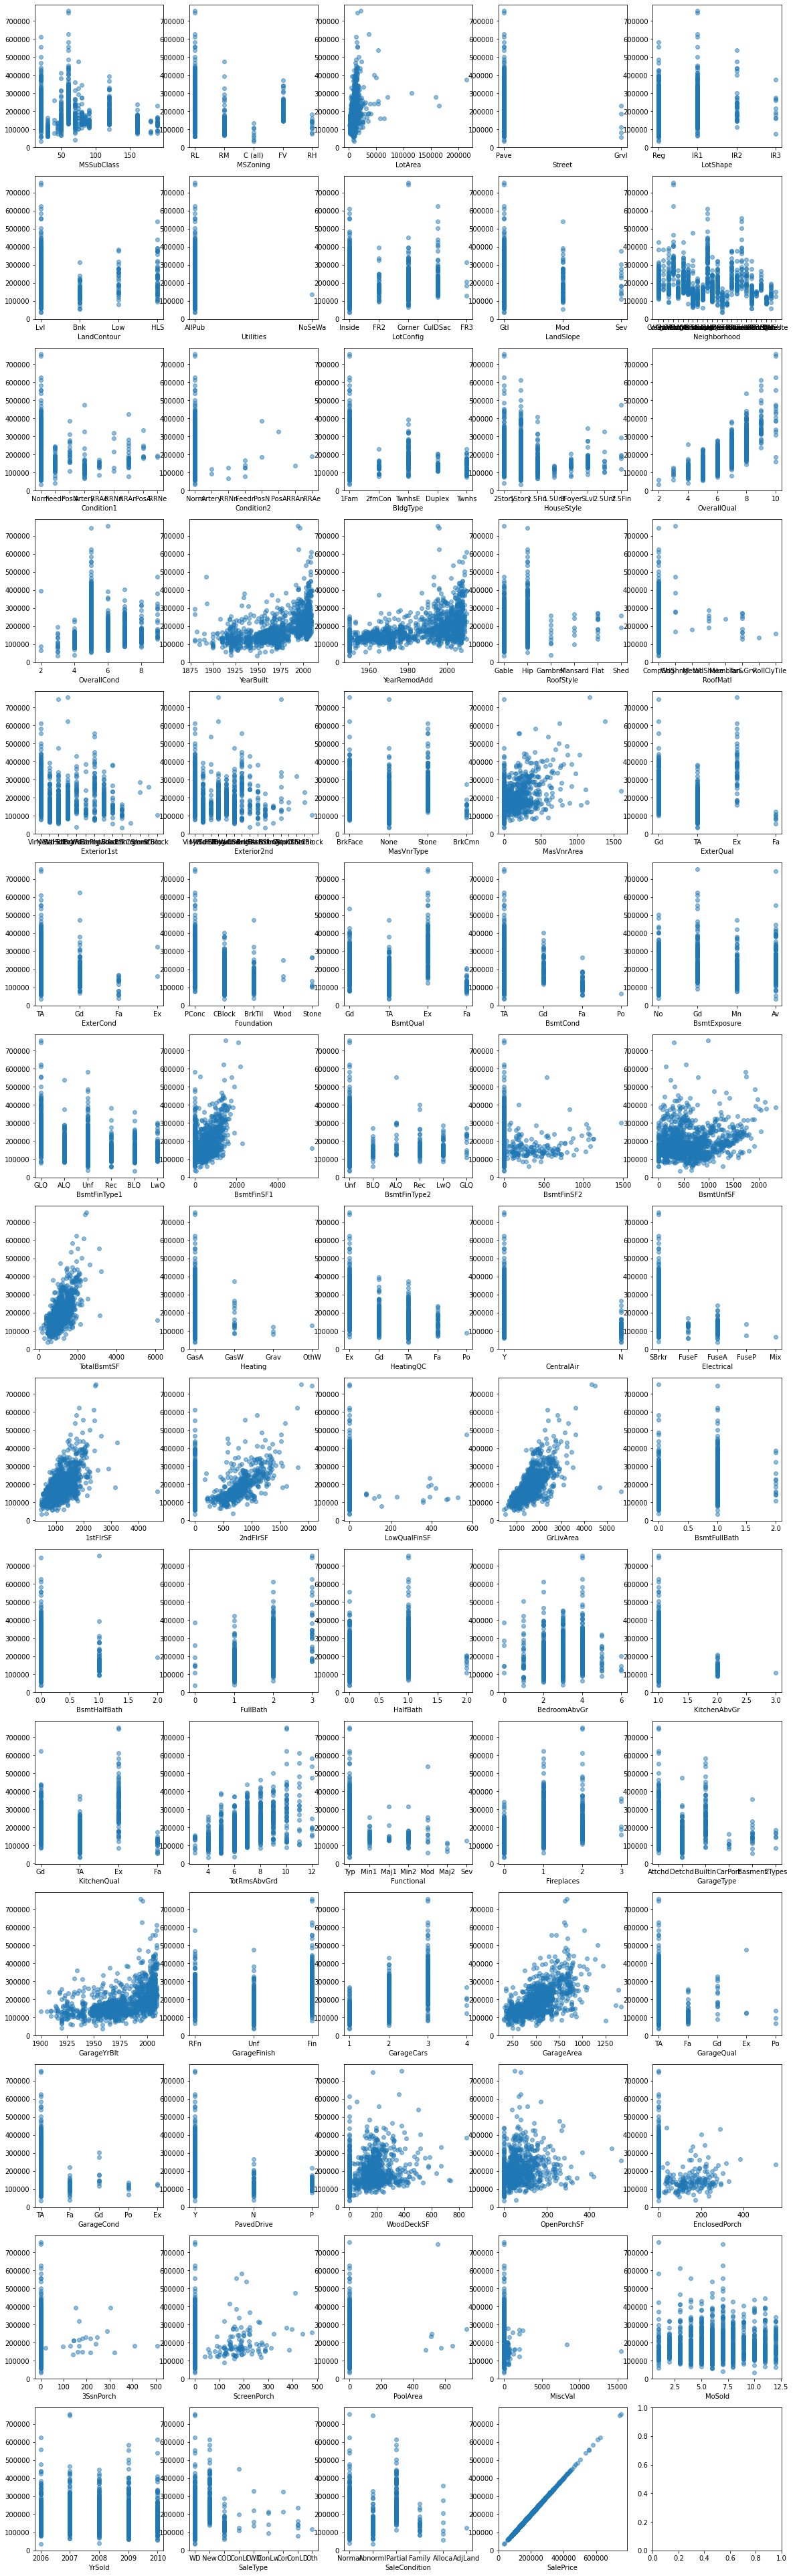

In [8]:
fig,axes = plt.subplots(15,5,figsize=(20,70))
axs = axes.ravel()
for i, col in enumerate(data.columns.values):
    ax = axs[i]
    ax.scatter(data[col], data['SalePrice'], alpha=0.5) 
    ax.set_xlabel(col)
    

Checking the scatter plot, we can see that:
* The following categorical variables could be dropped because the distribution is highly skewed (in other words, there's no need to have multiple categories): 'Street','Condition2', 'RoofStyle', 'RoofMatl', 'LowQualFinSF', 'PoolArea', 'YrSold', 'MoSold', '3SsnPorch', 'GarageCars', 'GarageQual', 'GarageCond', 'Utilities'. We will drop them all.

* There are ony a few samples having LotArea greater than 50,000, and these samples are far from other samples. Thus we could drop these samples. Similarly, there are samples with 'SalePrice' higher than 500000, 'MiscVal' greater than 5000.

In [9]:
drop_col = ['Street','Condition2', 'RoofStyle', 'RoofMatl','LowQualFinSF','PoolArea', 'YrSold','MoSold',
            '3SsnPorch','GarageCars','GarageQual','GarageCond','Utilities']
data = data.drop(columns=drop_col)
data = data.loc[data['LotArea'] < 50000]
data = data.loc[data['SalePrice'] < 500000]
data = data.loc[data['MiscVal'] < 5000 ]

### 2.3.2 Use VIF to identify highly correlated quantitative predictors 

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
exog = sm.add_constant(data[quantitative])
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(exog.values, i) for i in range(exog.shape[1])]
vif["features"] = exog.columns
corelated = vif.loc[vif['VIF Factor']>5]['features'].values

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [14]:
corelated

array(['YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea'], dtype=object)

In [15]:
data = data.drop(corelated,axis = 1)

In [19]:
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.090523,-0.328162,0.618742,-0.554698,0.858577,0.503894,1.117614,-0.249277,0.800986,1.194502,...,0,0,0,1,0,0,0,0,1,0
1,-0.878739,-0.074589,-0.151469,2.219496,-0.470149,-0.602333,-0.847537,3.906393,0.800986,-0.796838,...,0,0,0,1,0,0,0,0,1,0
2,0.090523,0.289232,0.618742,-0.554698,0.809365,0.311998,1.117614,-0.249277,0.800986,1.194502,...,0,0,0,1,0,0,0,0,1,0
3,0.332839,-0.085614,0.618742,-0.554698,-0.765422,-0.602333,1.117614,-0.249277,-1.052966,-0.796838,...,0,0,0,1,1,0,0,0,0,0
4,0.090523,0.952929,1.388954,-0.554698,0.710941,1.373073,1.117614,-0.249277,0.800986,1.194502,...,0,0,0,1,0,0,0,0,1,0


## 2.4 Get dummy variables 

Next, we label the quantitative (numerical) and qualitative (categorical) variables, and turn categorical variables to dummy variables. The dummy variables expand the columns of the data frame.

In [11]:
quantitative = [f for f in data.columns if data.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in data.columns if data.dtypes[f] == 'object']
data = pd.get_dummies(data, columns= qualitative)

## 2.5 Normalization

Before we start the modeling, one more thing to do is normalize the data.

In [12]:
from scipy import stats
for col in quantitative:
    norm = stats.zscore(data[col])
    data[col] = norm  
data['SalePrice'] = stats.zscore(data['SalePrice'])

# 3. Linear regression model

In this section,we will develop a linear regression model for the data. Specifically, we will address the following questions:

- Which predictor variables should be included in the model?
- Are the assumptions (constant variance, noramlity) satisfied?

In Section 3.1, we will buid a full linear model using all variables. Then we make hypothesis that some variables are unnecessary based on the p-values, and test the hypothesis.

## 3.1 Full linear model with all variables

In [45]:
import statsmodels.api as sm
exog = data.drop(['SalePrice'],axis = 1)
basemodel = sm.OLS(data['SalePrice'], exog)
base_results = basemodel.fit()
print(base_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     56.69
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        16:15:01   Log-Likelihood:                -349.83
No. Observations:                1317   AIC:                             1064.
Df Residuals:                    1135   BIC:                             2007.
Df Model:                         181                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -0.04

In [54]:
sse_f = base_results.ssr
df_f = base_results.df_resid
print("SSE of the base model is:", sse_f)

SSE of the base model is: 131.16919641132523


The SSE of the full model is 131.17, and the degree of freedom is 1135. With dummy variables, there are 181 predictors in total, which is too many. We will drop some unnecessary predictors in the following part.

## 3.2 Reduced model

In this part, we propose a reduced model by dropping the variables with p-value greater than 0.05. We will repeat dropping the varibales with p-value greater than 0.05 in the ANOVA until the p-values are all smaller than 0.05. Our hypothesis is that all the dropped variables are unnecessary. We will discuss more about the hypothesis in the next part.

In [27]:
# Drop the variables with p-value greater than 0.05 from the full model
pvalue = pd.DataFrame(results.pvalues,columns =['p']).reset_index()
insignificant = pvalue.loc[pvalue['p']>0.05]['index'].values
data_sig = data.drop(insignificant,axis = 1)
data_sig.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,...,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,GarageType_2Types,GarageType_BuiltIn,SaleType_WD
0,-0.328162,0.618742,-0.554698,0.858577,0.503894,1.117614,0.800986,1.194502,-0.170249,0.963374,...,0,1,1,0,0,1,0,0,0,1
1,-0.074589,-0.151469,2.219496,-0.470149,-0.602333,-0.847537,0.800986,-0.796838,-0.170249,-0.334594,...,1,0,0,0,0,0,1,0,0,1
2,0.289232,0.618742,-0.554698,0.809365,0.311998,1.117614,0.800986,1.194502,-0.170249,-0.334594,...,0,0,1,0,0,1,0,0,0,1
3,-0.085614,0.618742,-0.554698,-0.765422,-0.602333,1.117614,-1.052966,-0.796838,-0.170249,0.314390,...,0,1,0,0,0,1,0,0,0,1
4,0.952929,1.388954,-0.554698,0.710941,1.373073,1.117614,0.800986,1.194502,-0.170249,1.612357,...,0,0,1,0,0,1,0,0,0,1


In [3]:
# Calculate the p-values of the variables in the first reduced model
exog2 = sm.add_constant(data_sig.drop(['SalePrice'],axis = 1))
model2 = sm.OLS(data_sig['SalePrice'],exog2)
results2 = model2.fit()
print(results2.summary())

NameError: name 'sm' is not defined

In [29]:
pvalue2 = pd.DataFrame(results2.pvalues,columns =['p']).reset_index()
insignificant2 = pvalue2.loc[pvalue2['p']>0.05]['index'].values
data_sig2 = data_sig.drop(insignificant2[1:],axis = 1)
data_sig2.head()

,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFullBath,FullBath,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,...,Condition1_RRAe,Exterior1st_BrkFace,Foundation_BrkTil,BsmtQual_Ex,BsmtExposure_Gd,BsmtFinType1_GLQ,BsmtFinType1_Unf,KitchenQual_Ex,GarageType_2Types,SaleType_WD
0,-0.328162,0.618742,-0.554698,0.858577,0.503894,1.117614,0.800986,-0.170249,0.963374,-1.000259,...,0,0,0,0,0,1,0,0,0,1
1,-0.074589,-0.151469,2.219496,-0.470149,-0.602333,-0.847537,0.800986,-0.170249,-0.334594,0.579287,...,0,0,0,0,1,0,0,0,0,1
2,0.289232,0.618742,-0.554698,0.809365,0.311998,1.117614,0.800986,-0.170249,-0.334594,0.579287,...,0,0,0,0,0,1,0,0,0,1
3,-0.085614,0.618742,-0.554698,-0.765422,-0.602333,1.117614,-1.052966,-0.170249,0.314390,0.579287,...,0,0,1,0,0,0,0,0,0,1
4,0.952929,1.388954,-0.554698,0.710941,1.373073,1.117614,0.800986,-0.170249,1.612357,0.579287,...,0,0,0,0,0,1,0,0,0,1


In [30]:
quantitative3 = [f for f in data_sig2.columns if data_sig2.dtypes[f] != 'object']
quantitative3.remove('SalePrice')
exog3 = data_sig2[quantitative3]
model3 = sm.OLS(data_sig2['SalePrice'],exog3)
results3 = model3.fit()
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              251.8
Date:                Wed, 06 May 2020   Prob (F-statistic):                        0.00
Time:                        15:14:49   Log-Likelihood:                         -493.15
No. Observations:                1317   AIC:                                      1058.
Df Residuals:                    1281   BIC:                                      1245.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In the above model, all p-values are smaller than 0.05. We will use this model as our final reduced linear model. There are only 36 predictors in the reduced model. Recall that there are 181 in the full model. We dropped 181-36 = 145 variables in this step!

## 3.3 Hypothesis test

Null hypothesis H0: the coefficients of the 145 variables in the last step are all zeros.
Alternative hypothesis Ha: not all of the coefficients of the 145 variables in the last step are zero.
Decision rule: we will check the F score, which is defined by F = (SSE(R) - SSE(F))/(df(R) - df(F))/(SSE(F)/df(F)) ~ F(0.95, (df(R) - df(F)), df(F)).

Now let's test the null hypothesis.

In [55]:
sse_r = results3.ssr
df_r = results3.df_resid
print("SSE of the reduced model is:", results3.ssr)

SSE of the base model is: 147.1450493721514


In [57]:
# f statistics to test H0
F = (sse_r - sse_f)/(df_r - df_f)/(sse_f/df_f)
print(F)

0.9533668704306646


Since F(0.95, 145, 1135) = 1.22 > F, we conclude that we fail to reject H0.

Therefore, the coefficients of the 145 variables in the last step are all zeros. We could use the reduced linear model with only 36 variables to predict the sale price.  

## 3.4 Model selection using forward selection method 

In this part, we use forward selection method to further select the optimal combinations of predictors. 

In [39]:
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        
        scores_with_candidates = []
        for candidate in remaining:

            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
            model = smf.ols(formula, data)
    
            res = model.fit()
            score = res.rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

# Find the optimal linear model
data_sig2.rename(columns = {'3SsnPorch':'SsnPorch', '1stFlrSF':'stFlrSF','2ndFlrSF':'ndFlrSF',
                            'Exterior2nd_Wd Sdng':'Exterior2nd_WdSdng',
                      'Exterior2nd_Wd Shng':'Exterior2nd_WdShng','HouseStyle_1.5Unf':'HouseStyle_1_5Unf', 
                       'HouseStyle_2.5Fin':'HouseStyle_2_5Fin','HouseStyle_2.5Unf':'HouseStyle_2_5Unf',
                      'HouseStyle_1.5Fin':'HouseStyle_1_5Fin','RoofMatl_Tar&Grv':'RoofMatl_TarGrv',
                       'Exterior2nd_Brk Cmn':'Exterior2nd_BrkCmn','MSZoning_C (all)':'MSZoning_Call',
                       'Exterior1st_Wd Sdng':'Exterior1st_WdSdng'}, inplace = True)
optimal_linear_model = forward_selected(data_sig2, 'SalePrice')
print(optimal_linear_model.model.formula)
print(optimal_linear_model.rsquared_adj)

SalePrice ~ OverallQual + LotArea + GarageArea + BsmtQual_Ex + TotRmsAbvGrd + BsmtFinType1_Unf + YearRemodAdd + Fireplaces + Neighborhood_NoRidge + KitchenQual_Ex + BsmtExposure_Gd + Neighborhood_Crawfor + KitchenAbvGr + Neighborhood_StoneBr + FullBath + Exterior1st_BrkFace + Neighborhood_NridgHt + SaleType_WD + BsmtFullBath + OpenPorchSF + MasVnrArea + WoodDeckSF + Foundation_BrkTil + OverallCond + BsmtFinType1_GLQ + MSZoning_Call + Neighborhood_NWAmes + GarageType_2Types + ScreenPorch + Neighborhood_NAmes + Condition1_RRAe + LotConfig_CulDSac + Neighborhood_Mitchel + Neighborhood_OldTown + Neighborhood_Edwards + Condition1_Norm + 1
0.8851502962619131


In [40]:
import statsmodels.formula.api as smf
linear_results = smf.ols(optimal_linear_model.model.formula, data=data_sig4).fit()
print(linear_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     282.5
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        15:16:30   Log-Likelihood:                -425.56
No. Observations:                1316   AIC:                             925.1
Df Residuals:                    1279   BIC:                             1117.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0220 

Now we have the optimal linear model. In the next section, we will discuss the interaction terms. To simplify the model, we will only include two-way interactions between the numerical variables.

# 4. Interaction terms

In this section, we will add interaction terms into the linear regression model. We will start with a full model with all regression terms, and then use forward selection mothod the choose the optimal model.

## 4.1 Full model with all interaction terms

We list all the numerical variables as follows, and add their interaction terms into the optimal linear model and consider this model as a full model: 

In [67]:
var = ['OverallQual', 'GarageArea', 'LotArea', 'TotRmsAbvGrd', 'YearRemodAdd', 'Fireplaces', 'FullBath', 
       'BsmtFullBath', 'OpenPorchSF', 'MasVnrArea', 'WoodDeckSF', 'OverallCond', 'ScreenPorch']
fomula = optimal_linear_model.model.formula
for i in range(len(var)-1):
    for j in range(i+1,len(var)):
        fomula += '+ ' + var[i] + '*' + var[j]        
inter_results = smf.ols(fomula, data=data_sig2).fit()
print(inter_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     107.6
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        17:07:34   Log-Likelihood:                -277.35
No. Observations:                1316   AIC:                             784.7
Df Residuals:                    1201   BIC:                             1381.
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## 4.2 Model selection using forward selection method

We construct a forward select function for the model with interaction terms. Note that we keep all the linear terms from the optimal linear model we choose in Section 3, and add interaction terms to the optimal linear model. 

In [146]:
def forward_selected_interact(data, response):
    remaining = set()
    for i in range(len(var)-1):
        for j in range(i+1,len(var)):
            remaining.add(var[i] + '*' + var[j])      
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} + {} ".format(optimal_linear_model.model.formula, ' + '.join(selected + [candidate]))

            model = smf.ols(formula, data)
    
            res = model.fit()
            score = res.rsquared_adj
            scores_with_candidates.append((score, candidate))
            
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score

            
    formula = "{} + {} ".format(optimal_linear_model.model.formula,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

# Find the optimal model
optimal_linear_model_interaction = forward_selected_interact(data_sig4, 'SalePrice')
print(optimal_linear_model_interaction.model.formula)
print(optimal_linear_model_interaction.rsquared_adj)

SalePrice ~ OverallQual + LotArea + GarageArea + BsmtQual_Ex + TotRmsAbvGrd + BsmtFinType1_Unf + YearRemodAdd + Fireplaces + Neighborhood_NoRidge + KitchenQual_Ex + BsmtExposure_Gd + Neighborhood_Crawfor + KitchenAbvGr + Neighborhood_StoneBr + FullBath + Exterior1st_BrkFace + Neighborhood_NridgHt + SaleType_WD + BsmtFullBath + OpenPorchSF + MasVnrArea + WoodDeckSF + Foundation_BrkTil + OverallCond + BsmtFinType1_GLQ + MSZoning_Call + Neighborhood_NWAmes + GarageType_2Types + ScreenPorch + Neighborhood_NAmes + Condition1_RRAe + LotConfig_CulDSac + Neighborhood_Mitchel + Neighborhood_OldTown + Neighborhood_Edwards + Condition1_Norm + 1 + OverallQual*GarageArea + OverallQual*YearRemodAdd + OverallQual*TotRmsAbvGrd + YearRemodAdd*OverallCond + Fireplaces*OverallCond + OpenPorchSF*WoodDeckSF + OverallQual*Fireplaces + Fireplaces*MasVnrArea + OverallQual*BsmtFullBath + GarageArea*YearRemodAdd + OverallQual*LotArea + MasVnrArea*OverallCond + WoodDeckSF*ScreenPorch + YearRemodAdd*OpenPorchSF +

In [148]:
print(optimal_linear_model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        20:27:48   Log-Likelihood:                -285.02
No. Observations:                1316   AIC:                             708.0
Df Residuals:                    1247   BIC:                             1066.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# 5. Diagnostics and remedies

## 5.1 Residual plot

We will check the constant variance assumption by plotting the residuals against the predicted sale price.

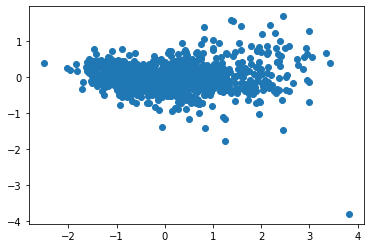

In [35]:
res = results4.resid
plt.scatter(results4.fittedvalues,res)

Clearly, there is an outlier on the right lower corner. Let's drop the outlier and plot the residuals again.

In [36]:
drop_idx = abs(res).argmax()
data_sig4 = data_sig3.drop(drop_idx)
# model5 = sm.OLS(data_sig4['SalePrice'],data_sig4.drop(['SalePrice'],axis = 1))
# results5 = model5.fit()
# print(results5.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              282.7
Date:                Wed, 06 May 2020   Prob (F-statistic):                        0.00
Time:                        15:15:24   Log-Likelihood:                         -425.69
No. Observations:                1316   AIC:                                      923.4
Df Residuals:                    1280   BIC:                                      1110.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


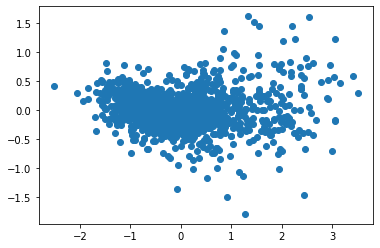

In [37]:
res = results5.resid
plt.scatter(results5.fittedvalues,res)

## 5.2 QQ plot

To check the assumption on normality, we do a QQ plot.

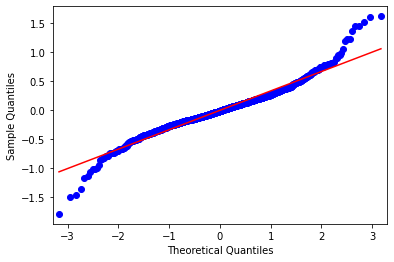

In [38]:
fig = sm.graphics.qqplot(res, line='s')
plt.show()

Notice the points fall along a line in the middle of the graph, but curve off in the extremities. Normal Q-Q plots that exhibit this behavior usually mean the data have more extreme values than would be expected if they truly came from a Normal distribution.

## 5.3 Influence statistics

In [34]:
infl = results4.get_influence()
df_infl = infl.summary_frame()
df_infl.head()

,dfb_LotArea,dfb_OverallQual,dfb_OverallCond,dfb_YearRemodAdd,dfb_MasVnrArea,dfb_BsmtFullBath,dfb_FullBath,dfb_KitchenAbvGr,dfb_TotRmsAbvGrd,dfb_Fireplaces,...,dfb_BsmtFinType1_Unf,dfb_KitchenQual_Ex,dfb_GarageType_2Types,dfb_SaleType_WD,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.000310,-0.001869,0.002124,-0.001855,-0.005079,-0.007859,-0.000342,0.005109,-0.010787,0.009483,...,0.000341,0.002749,-0.000785,-0.004059,0.000017,-0.258533,0.009140,-0.024830,-0.258438,-0.024821
1,0.006523,0.002072,-0.017561,0.010135,0.006279,0.009179,-0.012548,0.000019,0.004969,-0.002726,...,0.002590,-0.002619,-0.000411,-0.012911,0.000045,-0.244274,0.026206,-0.040073,-0.244185,-0.040058
2,0.011157,0.003059,-0.001775,0.002694,0.006515,0.011605,0.009261,0.000162,-0.010397,0.011029,...,0.000545,-0.005441,-0.001362,0.008257,0.000055,0.509478,0.007623,0.044654,0.509330,0.044641
3,0.040231,-0.114035,0.160218,-0.019090,0.057478,-0.079861,0.095200,0.004962,-0.010331,0.033938,...,0.102165,0.026825,0.050727,-0.034321,0.007295,-2.532875,0.039324,-0.512450,-2.538250,-0.513537
4,-0.014390,-0.017253,0.017591,-0.008072,0.028065,-0.035313,0.047422,0.017741,-0.057967,0.012174,...,0.012994,0.031605,0.012490,-0.010355,0.006790,-2.861623,0.028987,-0.494426,-2.869692,-0.495820


# 6. Summary

Results: In this section, you should report their results obtained by fitting the proposed models in the previous section. Emphasis should be placed on clarity, as if the report were a statistical consultant’s report for a nonstatistician. For instance, loads of R output would, in general, not be acceptable. Plots and well-organized tables are good things to have in this section. Possible questions to be addressed here are the following:

What is the final regression model for the data?
How was this model obtained, i.e. forward stepwise search (to be seen in class)?
Using the standard diagnostic tests, does the model appear to fit the data well?
What are the final confidence intervals for the effects of interest mentioned in the study section? Use your validation data to construct these intervals. Do these intervals seem very sensitive to the choice of model (i.e. do they vary widely for different choices of variables in the model)?
What is your estimated prediction accuracy for your model? (Evaluated on the validation set).
Compare the intervals constructed using your final selected model fit to the validation set to the same intervals constructed on the training set. Are they very different? Which do you believe more?

In [ ]:



## 3.1 Full linear model with all variables
3.2 Reduced model
3.3 Hypothesis test
3.4 Model selection using forward selection method
3.5 Diagnostics and remedies
4. Interaction terms
4.1 Full model with all interaction terms
4.2 Model selection using forward selection method
5. Diagnostics and remedies
5.1 Residual plot
5.2 QQ plot
5.3 Influence statistics
5.3.1 Identifying Outlying X: Hat Matrix Diagonals
5.3.2 Identifying Influential Cases using Cook's Distance
5.3.3 Multicollinearity Diagnostics: VIF
    6. Summary

In [ ]:
# diagnostics
# https://www.statsmodels.org/devel/stats.html#residual-diagnostics-and-specification-tests
# https://www.statsmodels.org/devel/examples/notebooks/generated/regression_diagnostics.html



# weighted Least Squares
# https://www.statsmodels.org/devel/examples/notebooks/generated/wls.html


# Linear Mixed Effects Models
# https://www.statsmodels.org/devel/examples/notebooks/generated/mixed_lm_example.html

# Influence Measures for GLM Logit
# https://www.statsmodels.org/devel/examples/notebooks/generated/influence_glm_logit.html

# Interactions and ANOVA
# https://www.statsmodels.org/devel/examples/notebooks/generated/interactions_anova.html

# statsmodels Principal Component Analysis
# https://www.statsmodels.org/devel/examples/notebooks/generated/pca_fertility_factors.html